In [21]:
import numpy as np
import matplotlib.pyplot as plt
from rickerpy import rickerpy
import scipy.signal as ss

Para poder unificar el tipo de letra y tamaño a lo largo de todo el flujo de trabajo se puede utilizar esto:

In [22]:
from matplotlib import rcParams
rcParams['text.usetex'] = True
plt.rc('font', family='serif')# otro tipos de letras...serif,monospace,sans
plt.rcParams.update({'font.size': 21})

Cargo algunos datos para plotear y defino algunas variables

In [23]:
# CARGO LOS DATOS:
sonico = np.loadtxt('DT.txt')
ondicula = rickerpy(108,2,30,-30)# ondicula de ricker o cargar una.
sintetico = np.loadtxt('sintetico.txt') 

dz= 0.1
dt = 0.002
profundidad = np.arange(0,len(sonico),1)*dz

Gráfico

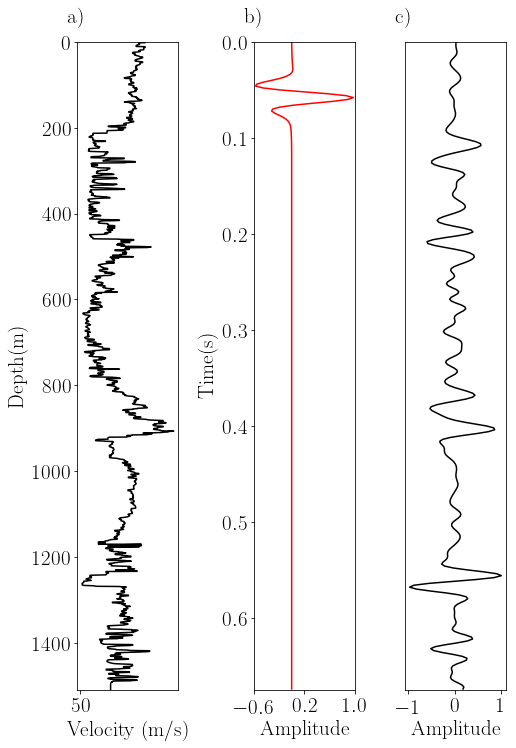

In [24]:
fig,ax = plt.subplots(1,3,figsize=(7,9)) # figsize nos dá las dimensiones de la base por altura.
#plt.subplots_adjust(wspace=0.58,hspace=0.1 )
labels_list=[r'a)',r'b)',r'c)'] # etiquetas para cada subplot


ondi = np.zeros(len(sintetico))
ondi[0:len(ondicula)] = ondicula # estiro la ondícula con ceros para podes comparar con el sintetico


ax[0].plot(sonico,profundidad,'k')
ax[0].set_xticks(np.arange(50,75,100)) # elegimos los valores entre los cuales graficar.
ax[0].set_ylabel('Depth(m)')
ax[0].invert_yaxis()                        # invertimos los ejes para graficar en profundidad. 
ax[0].set_ylim(1510,0)
ax[0].set_xlabel('Velocity (m/s)')
ax[0].set_position([0.1,0.2,0.2,1.])        # la gloria! permite acomodar los subplots a gusto
                                            # las opciones son: pos : [left, bottom, width, height] 
ax[0].text(-0.1,1.03, labels_list[0], 
           transform=ax[0].transAxes)       # la posicions de las etiquetas de cada subplot
#ax[0].grid()                               # para poner una grilla si hace falta


ax[1].plot(ondi,np.arange(0,len(sintetico))*0.002,'r')
ax[1].invert_yaxis()
ax[1].set_ylabel('Time(s)')
ax[1].set_xlabel('Amplitude')
ax[1].set_xlim(-0.6,1.)
ax[1].set_xticks(np.arange(-0.6,1.01,0.8))
#ax[2].set_yticks(np.arange(-27,28,13.5)*0.002)
ax[1].set_ylim(0.675,0)
ax[1].set_position([0.45,0.2,0.2,1.])
ax[1].text(-0.1,1.03, labels_list[1], transform=ax[1].transAxes)

ax[2].plot(sintetico,np.arange(0,len(sintetico))*dt,'k')
ax[2].set_xticks(np.arange(-1.,1.01,1.))
ax[2].invert_yaxis()
#ax[2].set_ylabel('time (s)')
ax[2].set_yticks([])                        # de esta manera no muestra los ticks en el eje y
ax[2].set_xlabel('Amplitude')
ax[2].set_ylim(0.675,0)
ax[2].set_position([0.75,0.2,0.2,1.])
ax[2].text(-0.1,1.03, labels_list[2], transform=ax[2].transAxes)

#plt.tight_layout() # si quiero acomodar la posicion delos subplots esta opción no puede ir

fig.savefig('guardo_grafico.pdf',format='pdf', dpi=300, bbox_inches='tight')

plt.show()